In [85]:
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
# import matplotlib.patches as patches
import numpy as np 
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
# from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

cwd = os.getcwd()
df = pd.read_csv(cwd + "/data_csv/train.csv")

In [86]:
print(df.columns)

label_value_count = df.emotion.value_counts()

print(label_value_count)
print(df.info())

Index(['Unnamed: 0', 'image', 'emotion'], dtype='object')
HAPPINESS    2120
NEUTRAL      2041
SURPRISE       78
ANGER          73
SADNESS        35
DISGUST         6
Name: emotion, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4353 non-null   int64 
 1   image       4353 non-null   object
 2   emotion     4353 non-null   object
dtypes: int64(1), object(2)
memory usage: 102.1+ KB
None


In [87]:
# Convert string emotion to float
dictionary = {'emotion':{'HAPPINESS':0,'NEUTRAL':1, 'SURPRISE':2, 'ANGER':3, 'SADNESS':4, 'DISGUST':5}}
df.replace(dictionary, inplace = True)

X = df.loc[:, df.columns != 'emotion']
y = df.loc[:,'emotion']

In [88]:
random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5, shuffle=False)

In [89]:
'''
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
'''

'\n# plot arrows\nfig1 = plt.figure(figsize=[12,12])\nax1 = fig1.add_subplot(111,aspect = \'equal\')\nax1.add_patch(\n    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color=\'green\',alpha = 0.5)\n    )\nax1.add_patch(\n    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color=\'red\',alpha = 0.5)\n    )\n\ntprs = []\naucs = []\nmean_fpr = np.linspace(0,1,100)\ni = 1\nfor train,test in cv.split(x,y):\n    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])\n    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])\n    tprs.append(interp(mean_fpr, fpr, tpr))\n    roc_auc = auc(fpr, tpr)\n    aucs.append(roc_auc)\n    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=\'ROC fold %d (AUC = %0.2f)\' % (i, roc_auc))\n    i= i+1\n\nplt.plot([0,1],[0,1],linestyle = \'--\',lw = 2,color = \'black\')\nmean_tpr = np.mean(tprs, axis=0)\nmean_auc = auc(mean_fpr, mean_tpr)\nplt.plot(mean_fpr, mean_tpr, color=\'blue\',\n         label=r\'Mean ROC (AUC = %0.2f )\' % (mean_auc),lw=2, alpha=1)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

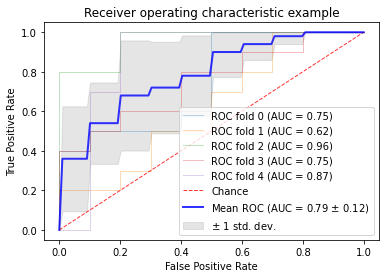

In [1]:
'''
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

print(X, y)

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# midle line
ax.plot([0, 1], [0, 1], linestyle="--", lw=1, color="r", label="Chance", alpha=0.8)

# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
'''

In [2]:
'''
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
'''

'\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("Receiver operating characteristic example")\n'

In [1]:
'''
precision = precision_score(y_test, y_pred, zero_division=0)
print('Precision score: {0:0.2f}'.format(precision))

recall = recall_score(y_test, y_pred, zero_division=0)
print('Recall score: {0:0.2f}'.format(recall))

f1 = f1_score(y_test, y_pred, zero_division=0)
print('f1 score: {0:0.2f}'.format(recall))
'''

"\nprecision = precision_score(y_test, y_pred, zero_division=0)\nprint('Precision score: {0:0.2f}'.format(precision))\n\nrecall = recall_score(y_test, y_pred, zero_division=0)\nprint('Recall score: {0:0.2f}'.format(recall))\n\nf1 = f1_score(y_test, y_pred, zero_division=0)\nprint('f1 score: {0:0.2f}'.format(recall))\n"

In [2]:
'''
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(y)

# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

clf = OneVsRestClassifier(QDA())
y_score = cross_val_predict(clf, X, y, cv=10 ,method='predict_proba')'''

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print(y_score, y_test)
print(y_score[:, 0], y_test[:, 0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = np.cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

[[-3.58459897 -0.31176426  1.78242707]
 [-2.15411929  1.11402775 -2.393737  ]
 [ 1.89199335 -3.89624382 -6.29685764]
 [-4.52609987 -0.63389114  1.96065819]
 [ 1.39684192 -1.77742447 -6.26300472]
 [-4.29544529 -1.45403694  3.29458805]
 [ 1.60323992 -2.10436714 -6.37623283]
 [-2.65028866 -1.23856217 -0.51739315]
 [-2.86540149 -0.51680531 -0.7183625 ]
 [-1.98461469 -0.42890191 -1.70646586]
 [-3.74016002  0.49686389  0.82186705]
 [-2.38375773 -1.40495745 -0.60548048]
 [-2.64026621 -0.18330583 -0.76615536]
 [-2.6974942  -0.48066147 -0.71100338]
 [-2.68086321 -0.48075311 -0.42256446]
 [ 1.65255174 -2.20173405 -6.40562627]
 [-2.52210662 -0.53055015 -0.52952971]
 [-2.41636546  0.45117003 -0.99069072]
 [ 1.25101273 -0.81698465 -6.36116848]
 [ 1.74739869 -3.24458567 -6.25493848]
 [-3.18923262 -0.1604106   1.00089508]
 [-2.45158845 -0.59284356 -0.24998163]
 [ 1.00481639 -1.56922072 -5.5277339 ]
 [ 1.26350425 -0.37929165 -6.32976484]
 [-3.02357691 -0.38552687  0.20999377]
 [ 2.02104714 -2.22672165

NameError: name 'np' is not defined